In [6]:
import numpy as np
import matplotlib
matplotlib.rcParams['legend.fancybox'] = True
import matplotlib.pyplot as plt
import scipy.integrate
from scipy.optimize import curve_fit

In [7]:
def w0(t,a):
    return a*t**(2/3)
    
def w1(t, a):
    return a*t**(1/3)

def w2(t, a):
    return a*t

In [8]:
params_cinflation={
    "G":1,
    "w":0,
    "tmax":10000,
    "rho":1,
    "R0":1,
    "dR0":0
    
    
}

In [9]:
class Inflate:
    def __init__(self, params):
        self.params=params
        for iparam, param in params.items():
            setattr(self, iparam, params[iparam])

    def set_param(self, parname, parval):
        setattr(self, parname, parval)


    def __call__(self,t, state):
        R=state[0]
        dR=state[1]
        density=self.rho*R**(-3*(1+self.w))
        dR=np.sqrt(8*np.pi*self.G/3*density*R**2)
        ddr=-4*np.pi*self.G/3*(1+3*self.w)*density*R
        return [dR, ddr]
        
            
    

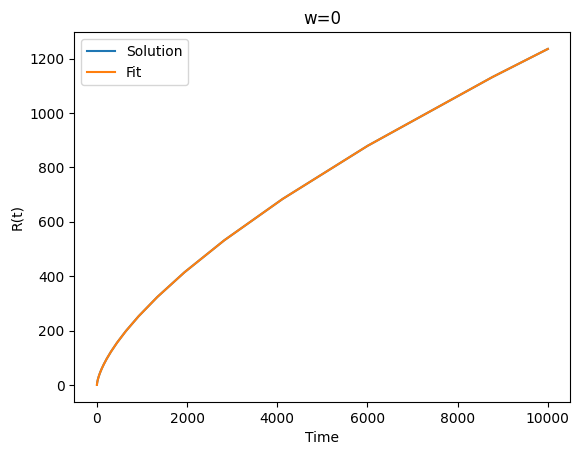

In [10]:
uni=Inflate(params_cinflation)
solution=scipy.integrate.solve_ivp(fun=uni, t_span=(0, uni.tmax), 
y0=[uni.R0, uni.dR0], vectorized=True, atol=1e-8,
rtol=1e-6, method="RK45", first_step=.001)
time=solution.t
scale=solution.y[0]
plt.plot(time, scale, label="Solution")
popt,pcov=curve_fit(w0, time, scale)
plt.plot(time, w0(time, popt[0]),label="Fit")
plt.legend()
plt.xlabel("Time")
plt.ylabel("R(t)")
plt.title("w=0")
plt.show()

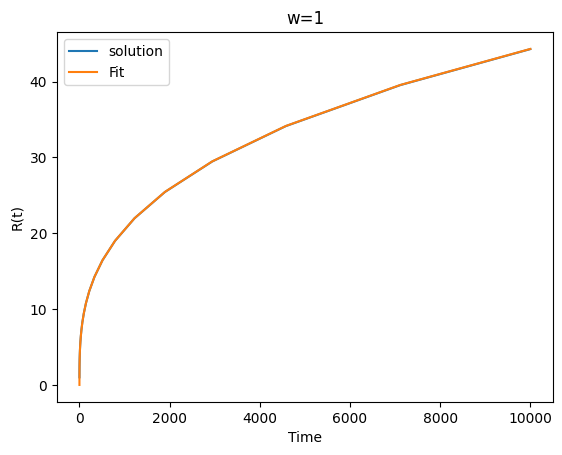

In [11]:
uni.set_param( "w", 1)
solution=scipy.integrate.solve_ivp(fun=uni, t_span=(0, uni.tmax), 
y0=[uni.R0, uni.dR0], vectorized=True, atol=1e-8,
rtol=1e-6, method="RK45", first_step=.001)
time=solution.t
scale=solution.y[0]
plt.plot(time, scale, label="solution")
popt,pcov=curve_fit(w1, time, scale)
plt.plot(time, w1(time, popt[0]), label="Fit")
plt.legend()
plt.xlabel("Time")
plt.ylabel("R(t)")
plt.title("w=1")
plt.show()

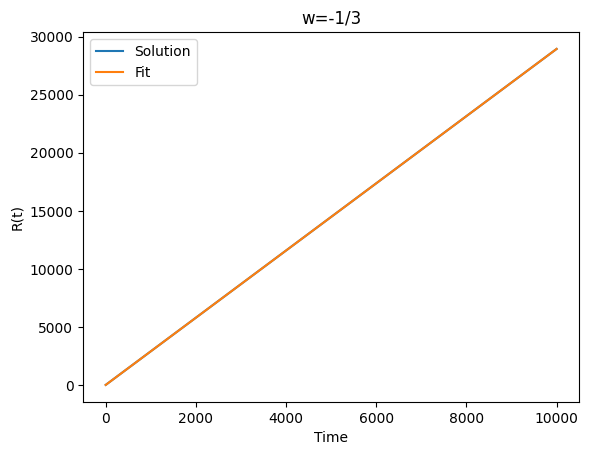

In [12]:
uni.set_param("w", -1/3)
solution=scipy.integrate.solve_ivp(fun=uni, t_span=(0, uni.tmax), 
y0=[uni.R0, uni.dR0], vectorized=True, atol=1e-8,
rtol=1e-6, method="RK45", first_step=.001)
time=solution.t
scale=solution.y[0]
plt.plot(time, scale, label="Solution")
popt,pcov=curve_fit(w2, time, scale)
plt.plot(time, w2(time, popt[0]), label="Fit")
plt.legend()
plt.xlabel("Time")
plt.ylabel("R(t)")
plt.title("w=-1/3")
plt.show()